<a href="https://colab.research.google.com/github/DiegoMTrujillo/Projects/blob/main/Final_Project_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**

# **Diego Miguel Trujillo Sierra**
### **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos**


# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.

## Dataset

Este dataset de KultureHire muestra las preferencias laborales de la GenZ en India, en relación con 15 variables resultantes de una encuesta, las variables son:

#### Información demográfica:

* País actual
* Código postal/Pin
* Género
* Aspiraciones profesionales:

#### Factores más influyentes en la elección de carrera
* Interés en estudios superiores fuera de India (autofinanciados)
* Estabilidad laboral (3 años o más con un mismo empleador)
* Importancia de la misión de la empresa (claramente definida y pública)
* Alineación de la misión de la empresa con acciones y productos
* Importancia del impacto social de la empresa
* Entorno de trabajo preferido
* Preferencias laborales:

### Empresas preferidas para trabajar
* Entorno de aprendizaje preferido
* Carreras más cercanas a la aspiración profesional
* Tipo de líder con el que se prefiere trabajar
* Configuración laboral deseada

# Limpieza y Transformación de Datos

Este dataframe no tenía valores nulos y, al tener solo valores categóricos o de objeto, no había outliers. Los datos tuvieron que ser codificados para poder ser utilizados en el modelo, lo que decidí hacer de forma manual, para poder agrupar algunas de las respuestas y poder tener un control sobre las columnas. Esto se realizó con con mapeo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UCamp/Proyecto Final/Your Career Aspirations of GenZ.csv')

In [ ]:
df.head()

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."
3,India,834003,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team
4,India,301019,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,No,Will NOT work for them,5,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...",Teaching in any of the institutes/online or Of...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     235 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          235 non-null    int64 
 2   Your Gender                                                                                                               235 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             235 non-null    ob

In [ ]:
df['Your Current Country.'].value_counts()

India                       231
Germany                       2
United Arab Emirates          1
United States of America      1
Name: Your Current Country., dtype: int64

In [ ]:
for column in df.columns:
    print(f"{column}:")
    print(df[column].value_counts())
    print("\n")

Your Current Country.:
India                       231
Germany                       2
United Arab Emirates          1
United States of America      1
Name: Your Current Country., dtype: int64


Your Current Zip Code / Pin Code:
605110    8
425001    8
785001    3
852201    3
605102    3
         ..
533342    1
600053    1
370110    1
110017    1
122002    1
Name: Your Current Zip Code / Pin Code, Length: 190, dtype: int64


Your Gender:
Male      156
Female     79
Name: Your Gender, dtype: int64


Which of the below factors influence the most about your career aspirations ?:
My Parents                                       79
People who have changed the world for better     57
People from my circle, but not family members    39
Influencers who had successful careers           37
Social Media like LinkedIn                       23
Name: Which of the below factors influence the most about your career aspirations ?, dtype: int64


Would you definitely pursue a Higher Education / Post Gra

In [ ]:
# Eliminar los valores que no correspondan a India
df = df[df['Your Current Country.'] == 'India']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     231 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          231 non-null    int64 
 2   Your Gender                                                                                                               231 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             231 non-null    ob

In [ ]:
# Eliminar columna de código postal
df = df.drop('Your Current Zip Code / Pin Code', axis=1)

In [ ]:
# Sustituir valores de columna 'Which of the below factors influence the most about your career aspirations ?'
mapeo_valores = {
    'My Parents': 1,
    'People who have changed the world for better': 2,
    'People from my circle, but not family members': 3,
    'Influencers who had successful careers': 4,
    'Social Media like LinkedIn': 5
}
df['Which of the below factors influence the most about your career aspirations ?'] = df['Which of the below factors influence the most about your career aspirations ?'].replace(mapeo_valores)
df.rename(columns={'Which of the below factors influence the most about your career aspirations ?': 'influence_factors'}, inplace=True)
print(df['influence_factors'].unique())

[2 5 3 4 1]


Factores que influyeron en las aspiraciones profesionales:
1. 'My Parents'
2. 'People who have changed the world for better'
3. 'People from my circle, but not family members'
4. 'Influencers who had successful careers'
5. 'Social Media like LinkedIn'


In [ ]:
# Transformar valores de 'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.'
mapeo_educacion = {
    'Yes, I will earn and do that': 1,
    'No I would not be pursuing Higher Education outside of India': 2,
    'No, But if someone could bare the cost I will': 3
}
df['Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.'] = df['Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.'].replace(mapeo_educacion)
df.rename(columns={'Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.': 'continue_education'}, inplace=True)
print(df['continue_education'].unique())

[1 3 2]


Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.
1. Yes, I will earn and do that
2. No I would not be pursuing Higher Eduation outside of India
3. No, But if someone could bare the cost I will

In [ ]:
# Transformar columna: 'How likely is that you will work for one employer for 3 years or more ?'
mapeo_trabajo = {
    'This will be hard to do, but if it is the right company I would try': 1,
    'Will work for 3 years or more': 2,
    'No way, 3 years with one employer is crazy': 3
}
df['How likely is that you will work for one employer for 3 years or more ?'] = df['How likely is that you will work for one employer for 3 years or more ?'].replace(mapeo_trabajo)
df.rename(columns={'How likely is that you will work for one employer for 3 years or more ?': 'work_3_years'}, inplace=True)
print(df['work_3_years'].unique())


[1 2 3]


'How likely is that you will work for one employer for 3 years or more ?'
1. This will be hard to do, but if it is the right company I would try
2. Will work for 3 years or more
3. No way, 3 years with one employer is crazy

In [ ]:
# Transformar columna: 'Would you work for a company whose mission is not clearly defined and publicly posted.'
mapeo_mision = {
    'No': 0,
    'Yes': 1
}
df['Would you work for a company whose mission is not clearly defined and publicly posted.'] = df['Would you work for a company whose mission is not clearly defined and publicly posted.'].replace(mapeo_mision)
df.rename(columns={'Would you work for a company whose mission is not clearly defined and publicly posted.': 'unaligned_mission'}, inplace=True)
print(df['unaligned_mission'].unique())

[0 1]


'Would you work for a company whose mission is not clearly defined and publicly posted.'
0. No
1. Yes

In [ ]:
# Transformar columna: 'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?'
mapeo_acciones = {
    'Will NOT work for them': 0,
    'Will work for them': 1
}
df['How likely would you work for a company whose mission is misaligned with their public actions or even their product ?'] = df['How likely would you work for a company whose mission is misaligned with their public actions or even their product ?'].replace(mapeo_acciones)
df.rename(columns={'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?': 'unaligned_actions'}, inplace=True)
print(df['unaligned_actions'].unique())


[0 1]


'How likely would you work for a company whose mission is misaligned with their public actions or even their product ?'
1. Will NOT work for them
2. Will work for them

In [ ]:
# Transformar columna:
mapeo_ambiente = {
    'Fully Remote with Options to travel as and when needed': 1,
    'Hybrid Working Environment with less than 15 days a month at office': 2,
    'Every Day Office Environment': 3,
    'Hybrid Working Environment with less than 10 days a month at office': 4,
    'Hybrid Working Environment with less than 3 days a month at office': 5,
    'Fully Remote with No option to visit offices': 6
}
df['What is the most preferred working environment for you.'] = df['What is the most preferred working environment for you.'].replace(mapeo_ambiente)
df.rename(columns={'What is the most preferred working environment for you.': 'preferred_environment'}, inplace=True)
print(df['preferred_environment'].unique())


[6 1 2 3 4 5]


'What is the most preferred working environment for you.'
1. 'Fully Remote with Options to travel as and when needed'
2. 'Hybrid Working Environment with less than 15 days a month at office'
3. 'Every Day Office Environment'
4. 'Hybrid Working Environment with less than 10 days a month at office'
5. 'Hybrid Working Environment with less than 3 days a month at office'
6. 'Fully Remote with No option to visit offices'

In [ ]:
# Transformar: 'Which of the below Employers would you work with.'
mapeo_empleador = {
    'Employer who pushes your limits by enabling an learning environment, and rewards you at the end': 1,
    'Employer who appreciates learning and enables that environment': 1,
    'Employer who rewards learning and enables that environment': 1,
    'Employer who pushes your limits and doesn\'t enables learning environment and never rewards you': 2,
    'Employers who appreciates learning but doesn\'t enables an learning environment': 2
}
df['Which of the below Employers would you work with.'] = df['Which of the below Employers would you work with.'].replace(mapeo_empleador)
df.rename(columns={'Which of the below Employers would you work with.': 'preferred_employer'}, inplace=True)
print(df['preferred_employer'].unique())


[1 2]


'Which of the below Employers would you work with.'
Esta variable se agrupó en solo dos opciones para simplificar el modelo:
1. Enfocado en el aprendizaje
2. No enfocado en el aprendizaje

In [ ]:
# Transformar:'Which type of learning environment that you are most likely to work in ?'
mapeo_entorno_aprendizaje = {
    'Instructor or Expert Learning Programs, Trial and error by doing side projects within the company': 1,
    'Self Paced Learning Portals, Instructor or Expert Learning Programs': 2,
    'Self Paced Learning Portals, Trial and error by doing side projects within the company': 3,
    'Self Paced Learning Portals, Learning by observing others': 4,
    'Instructor or Expert Learning Programs, Learning by observing others': 5,
    'Learning by observing others, Trial and error by doing side projects within the company': 6
}
df['Which type of learning environment that you are most likely to work in ?'] = df['Which type of learning environment that you are most likely to work in ?'].replace(mapeo_entorno_aprendizaje)
df.rename(columns={'Which type of learning environment that you are most likely to work in ?': 'learning_environment'}, inplace=True)
print(df['learning_environment'].unique())


[1 2 3 4 5 6]


'Which type of learning environment that you are most likely to work in ?' --> 'learning_environment'
1. 'Instructor or Expert Learning Programs, Trial and error by doing side projects within the company'
2. 'Self Paced Learning Portals, Instructor or Expert Learning Programs'
3. 'Self Paced Learning Portals, Trial and error by doing side projects within the company'
4. 'Self Paced Learning Portals, Learning by observing others'
5. 'Instructor or Expert Learning Programs, Learning by observing others'
6. 'Learning by observing others, Trial and error by doing side projects within the company'

In [ ]:
# Categorizar la columna: 'Which of the below careers looks close to your Aspirational job ?'
def categorizar_aspiraciones(descripcion):
    if 'Business' in descripcion or 'Management' in descripcion:
        return 'Business'
    elif 'Teaching' in descripcion or 'Teach' in descripcion or 'Institute' in descripcion:
        return 'Teaching'
    elif 'Design' in descripcion or 'Creative' in descripcion or 'content' in descripcion:
        return 'Creative'
    elif 'Data' in descripcion or 'Software' in descripcion or 'Computer' in 'Descripcion':
        return 'Data and Computer Sciences'
    elif 'freelancer' in descripcion or 'Freelancing' in descripcion:
        return 'Freelancing'
    else:
        return 'Others'
df['preferred_career'] = df['Which of the below careers looks close to your Aspirational job ?'].apply(categorizar_aspiraciones)
print(df[['Which of the below careers looks close to your Aspirational job ?', 'preferred_career']].head())


  Which of the below careers looks close to your Aspirational job ?  \
0  Business Operations in any organization, Build...                  
1  Business Operations in any organization, Build...                  
2  Manage and drive End-to-End Projects or Produc...                  
3  Business Operations in any organization, Manag...                  
4  Teaching in any of the institutes/online or Of...                  

  preferred_career  
0         Business  
1         Business  
2         Creative  
3         Business  
4         Business  


In [ ]:
df.drop('Which of the below careers looks close to your Aspirational job ?', axis=1, inplace=True)
df['preferred_career'].unique()

array(['Business', 'Creative', 'Teaching', 'Data and Computer Sciences',
       'Others'], dtype=object)

In [ ]:
mapeo_carreras = {
    'Business': 1,
    'Creative': 2,
    'Data and Computer Sciences': 3,
    'Freelancing': 4,
    'Teaching': 5,
    'Others': 6
}
df['preferred_career'] = df['preferred_career'].replace(mapeo_carreras)
print(df['preferred_career'].unique())

[1 2 5 3 6]


'Which of the below careers looks close to your Aspirational job ?' --> 'preferred_career'
Debido al amplio número de opciones que los entrevistados ingresaron, se categorizaron en 6:
1. Business
2. Creative
3. Data and Computer Sciences
4. Freelancing
5. Teaching
6. Others

In [ ]:
# Transformar 'What type of Manager would you work without looking into your watch ?'
mapeo_manager = {
    'Manager who explains what is expected, sets a goal and helps achieve it': 1,
    'Manager who clearly describes what she/he needs': 2,
    'Manager who sets goal and helps me achieve it': 3,
    'Manager who sets targets and expects me to achieve it': 4,
    'Manager who sets unrealistic targets': 5
}
df['What type of Manager would you work without looking into your watch ?'] = df['What type of Manager would you work without looking into your watch ?'].replace(mapeo_manager)
df.rename(columns={'What type of Manager would you work without looking into your watch ?': 'preferred_manager'}, inplace=True)
print(df['preferred_manager'].unique())


[1 3 2 4 5]


'What type of Manager would you work without looking into your watch ?'--> 'preferred_manager'
1. 'Manager who explains what is expected, sets a goal and helps achieve it'
2. 'Manager who clearly describes what she/he needs'
3. 'Manager who sets goal and helps me achieve it'
4. 'Manager who sets targets and expects me to achieve it'
5. 'Manager who sets unrealistic targets'

In [ ]:
# Transformar columna: 'Which of the following setup you would like to work ?'
mapeo_tamaño_equipo = {
    'Work alone': 1,
    'Work with 2 to 3 people in my team': 2,
    'Work with 5 to 6 people in my team': 2,
    'Work with 7 to 10 or more people in my team': 3,
    'Work with more than 10 people in my team': 4,
    'Work alone, Work with 2 to 3 people in my team': 1,
    'Work with 2 to 3 people in my team, Work with 5 to 6 people in my team': 2,
    'Work alone, Work with 2 to 3 people in my team, Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team': 4,
    'Work alone, Work with 5 to 6 people in my team': 2,
    'Work alone, Work with more than 10 people in my team': 4,
    'Work with 5 to 6 people in my team, Work with more than 10 people in my team': 4,
    'Work with 2 to 3 people in my team, Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team': 4,
    'Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team': 4,
    'Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team': 4,
    'Work with 2 to 3 people in my team, Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team': 4,
    'Work with 2 to 3 people in my team, Work with 7 to 10 or more people in my team, Work with more than 10 people in my team': 4,
    'Work alone, Work with 2 to 3 people in my team, Work with 7 to 10 or more people in my team': 4,
    'Work with 7 to 10 or more people in my team, Work with more than 10 people in my team': 4,
    'Work alone, Work with 2 to 3 people in my team, Work with 5 to 6 people in my team, Work with 7 to 10 or more people in my team': 4,
    'Work alone, Work with 2 to 3 people in my team, Work with 5 to 6 people in my team': 2
}
df['Which of the following setup you would like to work ?'] = df['Which of the following setup you would like to work ?'].replace(mapeo_tamaño_equipo)
df.rename(columns={'Which of the following setup you would like to work ?': 'team_size_preference'}, inplace=True)
print(df['team_size_preference'].unique())

[4 2 3 1]


'Which of the following setup you would like to work ?' --> 'team_size_preference'
1. Work Alone
2. Small Teams (2 to 6 people)
3. Medium Teams (7 to 10)
4. Large Team (more than 10)

En caso de que la persona haya mostrado varias preferencias, se clasificó con la preferencia mayor.


In [ ]:
df.rename(columns={'Your Current Country.': 'country'}, inplace=True)
df.rename(columns={'Your Gender': 'gender'}, inplace=True)
df.rename(columns={'How likely would you work for a company whose mission is not bringing social impact ?': 'social_impact'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 234
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country                231 non-null    object
 1   gender                 231 non-null    object
 2   influence_factors      231 non-null    int64 
 3   continue_education     231 non-null    int64 
 4   work_3_years           231 non-null    int64 
 5   unaligned_mission      231 non-null    int64 
 6   unaligned_actions      231 non-null    int64 
 7   social_impact          231 non-null    int64 
 8   preferred_environment  231 non-null    int64 
 9   preferred_employer     231 non-null    int64 
 10  learning_environment   231 non-null    int64 
 11  preferred_manager      231 non-null    int64 
 12  team_size_preference   231 non-null    int64 
 13  preferred_career       231 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 27.1+ KB


In [ ]:
# Cambiar a categoría
columnas_categoricas = ['gender', 'influence_factors', 'continue_education', 'work_3_years', 'unaligned_mission', 'unaligned_actions', 'social_impact' , 'preferred_environment', 'preferred_employer', 'preferred_manager', 'team_size_preference', 'learning_environment', 'preferred_career']
for columna in columnas_categoricas:
    df[columna] = df[columna].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 234
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                231 non-null    object  
 1   gender                 231 non-null    category
 2   influence_factors      231 non-null    category
 3   continue_education     231 non-null    category
 4   work_3_years           231 non-null    category
 5   unaligned_mission      231 non-null    category
 6   unaligned_actions      231 non-null    category
 7   social_impact          231 non-null    category
 8   preferred_environment  231 non-null    category
 9   preferred_employer     231 non-null    category
 10  learning_environment   231 non-null    category
 11  preferred_manager      231 non-null    category
 12  team_size_preference   231 non-null    category
 13  preferred_career       231 non-null    category
dtypes: category(13), object(1)
memory usage: 8

# 2. Análisis EDA

Una vez con el df codificado, continué con el análisis exploratorio de datos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UCamp/Proyecto Final/genz_asp_clean.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 231 non-null    int64   
 1   influence_factors      231 non-null    category
 2   continue_education     231 non-null    category
 3   work_3_years           231 non-null    category
 4   unaligned_mission      231 non-null    category
 5   unaligned_actions      231 non-null    category
 6   social_impact          231 non-null    category
 7   preferred_environment  231 non-null    category
 8   preferred_employer     231 non-null    category
 9   learning_environment   231 non-null    category
 10  preferred_manager      231 non-null    category
 11  team_size_preference   231 non-null    category
 12  preferred_career       231 non-null    category
dtypes: category(12), int64(1)
memory usage: 6.9 KB


In [ ]:
df.drop(columns=['country'], inplace=True)

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].astype("category")
print(df.dtypes)

gender                     object
influence_factors        category
continue_education       category
work_3_years             category
unaligned_mission        category
unaligned_actions        category
social_impact            category
preferred_environment    category
preferred_employer       category
learning_environment     category
preferred_manager        category
team_size_preference     category
preferred_career         category
dtype: object


In [ ]:
gender_map = {"Male": 0, "Female": 1}
df["gender"] = df["gender"].map(gender_map)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fully Remote with Opt to travel'),
  Text(1, 0, 'Hybrid Working Environment <15 days office/month'),
  Text(2, 0, 'Every Day Office Environment'),
  Text(3, 0, 'Hybrid Working Environment<10 days office/month'),
  Text(4, 0, 'Hybrid Working Environment <3 days office/month'),
  Text(5, 0, 'Fully Remote')])

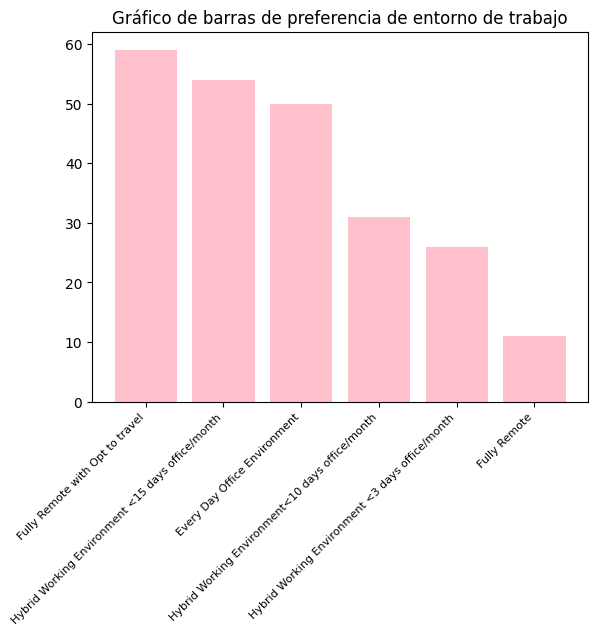

In [ ]:
import matplotlib.pyplot as plt

# Diccionario para mapear los valores actuales a las descripciones
environment_labels = {
    1: 'Fully Remote with Opt to travel',
    2: 'Hybrid Working Environment <15 days office/month',
    3: 'Every Day Office Environment',
    4: 'Hybrid Working Environment<10 days office/month',
    5: 'Hybrid Working Environment <3 days office/month',
    6: 'Fully Remote'
}

counts = df['preferred_environment'].value_counts()
labels = counts.index.map(lambda x: environment_labels.get(x))
plt.bar(labels, counts, color = 'pink')
plt.title('Gráfico de barras de preferencia de entorno de trabajo')
plt.xticks(rotation=45, ha="right", fontsize=8)

Al contrario de lo que se esperaba, únicamente una minoría de los encuestados prefieren el entorno de trabajo 'Fully Remote', mientras que la mayoría prefiere un trabajo remoto o híbrido, pero sí está dispuesto a asistir a la oficina en cierta medida. Además en tercer lugar de entorno preferido, se encuentran aquellos que prefieren asistir diariamente a la oficina.

In [ ]:
environments = {
    1: 'Fully Remote with Options to travel',
    2: 'Hybrid <15 days at office',
    3: 'Every Day Office',
    4: 'Hybrid <10 days at office',
    5: 'Hybrid <3 days at office',
    6: 'Fully Remote with No office visit'
}
employers = {
    1: 'Learning-focused',
    2: 'Not Learning-focused'
}

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

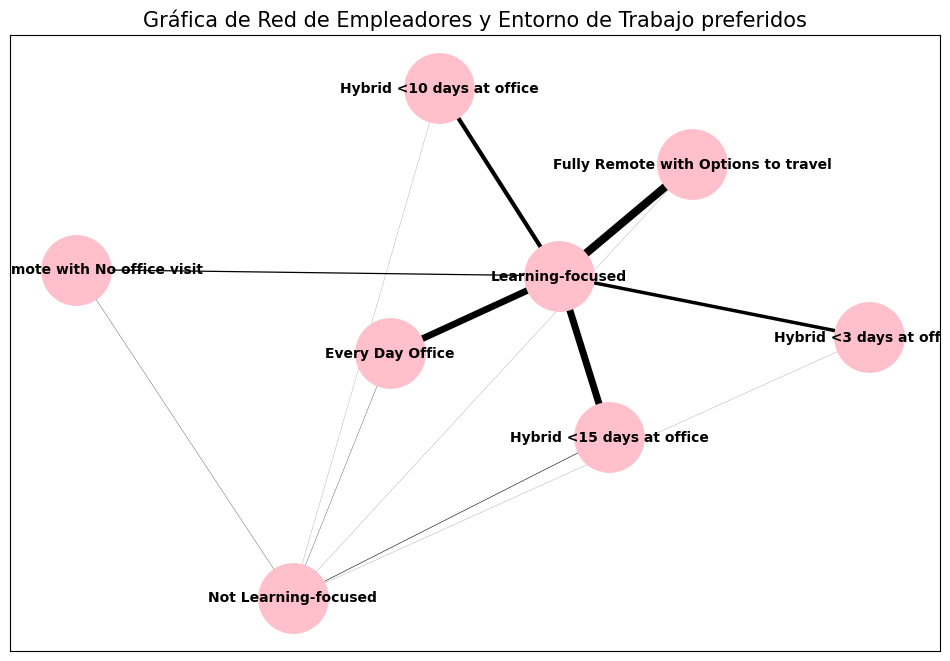

In [ ]:
# Gráfica de Red entre preferred environment y preferred employer
weights = df.groupby(['preferred_environment', 'preferred_employer']).size().reset_index(name='weight')
for index, row in weights.iterrows():
    env_node = environments[row['preferred_environment']]
    emp_node = employers[row['preferred_employer']]
    weight = row['weight']
    G.add_edge(env_node, emp_node, weight=weight)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edge_weights = nx.get_edge_attributes(G, 'weight')

# Dibujar nodos y etiquetas
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='pink')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
for (node1, node2, weight) in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[(node1, node2)], width=weight*0.1)

plt.title('Gráfica de Red de Empleadores y Entorno de Trabajo preferidos', fontsize =15)
plt.show()


El mapa de nodos muestra que la mayoría de los encuestados prefiere un entorno enfocado en el aprendizaje, lo que est¿a relacionado con los tres entornos de trabajo preferidos.

Muy pocos GenZ en India no están orientados en el aprendizaje.

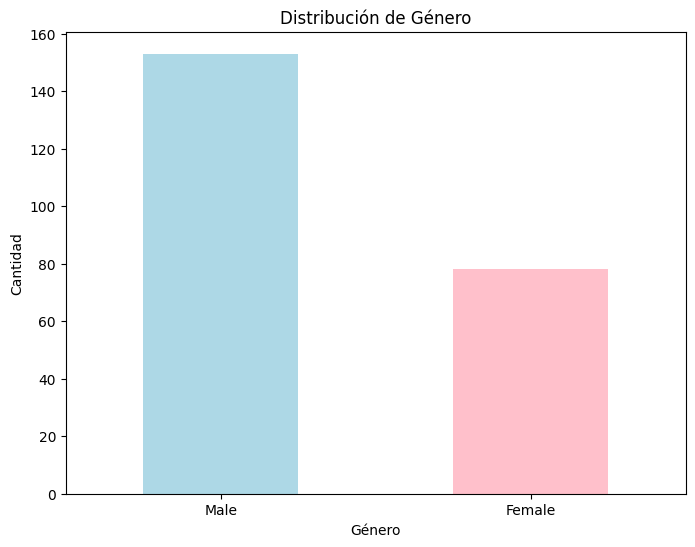

In [ ]:
gender_counts = df['gender'].value_counts().rename(index={0: 'Male', 1: 'Female'})

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

En el dataset, hay cerca de 160 hombres y cerca de 80 mujeres. Aunque el número de hombres es mayor, el número de mujeres es significativo, por lo que no hay que hacer ajustes, lo cual tampoco sería prudente, debido al tamaño del dataset.

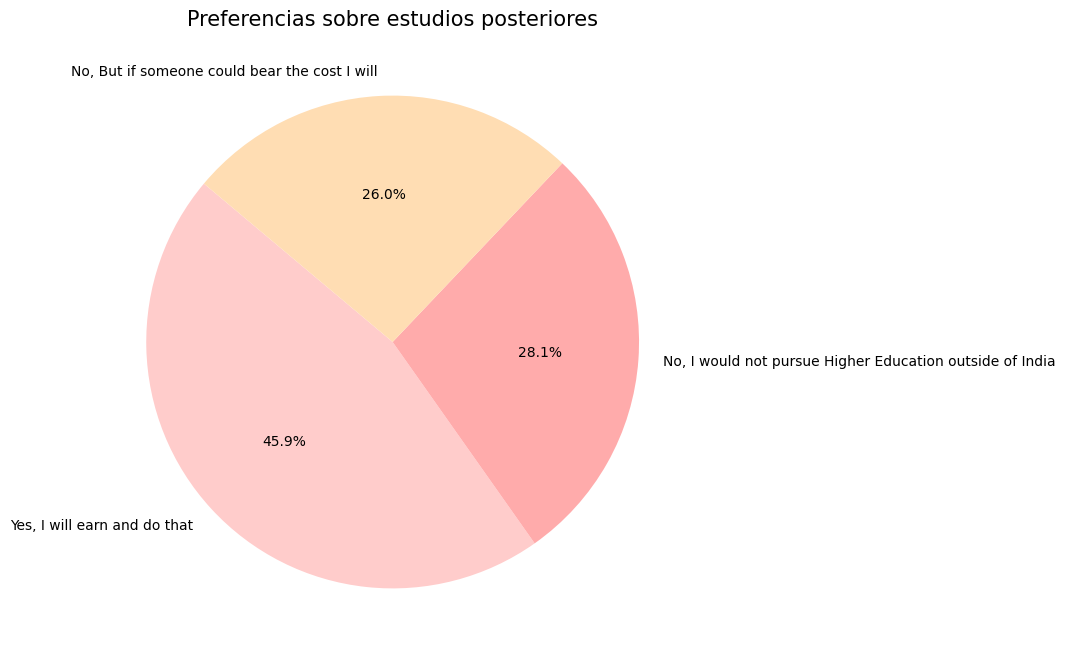

In [ ]:
# Código del gráfico de pastel para educación
education_counts = df['continue_education'].value_counts()
labels = {
    1: 'Yes, I will earn and do that',
    2: 'No, I would not pursue Higher Education outside of India',
    3: 'No, But if someone could bear the cost I will'
}

education_counts.index = [labels[idx] for idx in education_counts.index]
colors = ['#ffcccb', '#ffabab', '#ffddb3']
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Preferencias sobre estudios posteriores', fontsize=15)
plt.show()

En cuanto a las aspiraciones académicas, solo el 30% no tiene intención alguna de continuar con sus estudios fuera de India, mientras que el 46% está ahorrando activamente para hacerlo.

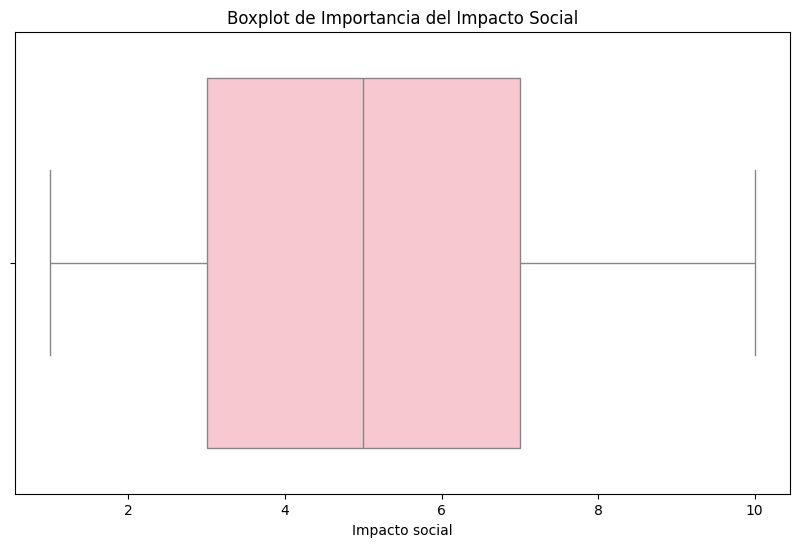

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Boxplot para la variable 'social_impact'
plt.figure(figsize=(10, 6))
sns.boxplot(x='social_impact', data=df, color ='pink')
plt.title('Boxplot de Importancia del Impacto Social')
plt.xlabel('Impacto social')
plt.show()

En cuanto al impacto social, el dataset está distribuido al centro.

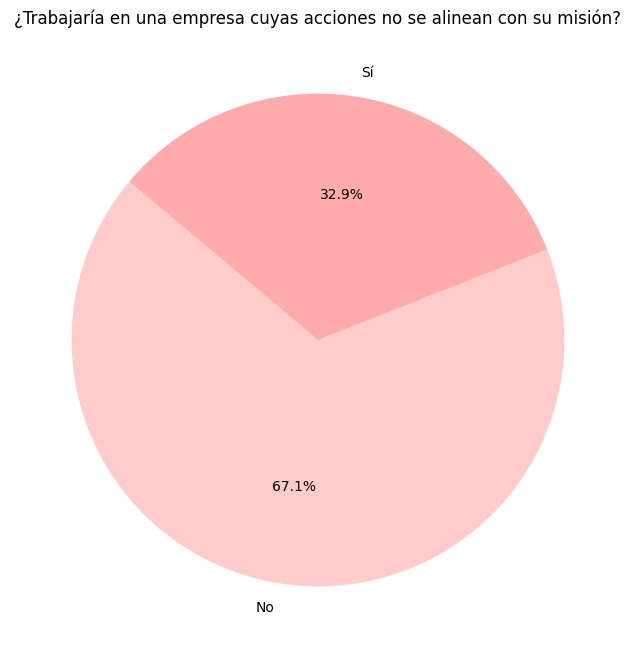

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ua_counts = df['unaligned_actions'].value_counts().sort_index()

colors = ['#ffcccb', '#ffabab','#99ff99','#ffcc99']

# Gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(ua_counts, labels=['No', 'Sí'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('¿Trabajaría en una empresa cuyas acciones no se alinean con su misión?')
plt.show()


En cuanto a la pregunta sobre si los GenZ están dispuestos a trabajar para una empresa cuyas acciones no estén alineadas con la misión, 2/3 respondieron que no lo harían, mientras que para 1/3 no es un elemento relevante.

# 3. Creación del modelo y graficación de resultados

### Número de componentes óptimo (PCA)

## PCA, Método del Codo, Dendograma y Método de la Silueta

* PCA - El PCA mostró como resultado que el número principal de componentes óptimo es de 5. Sin embargo, ese puede ser un número muy elevado de componentes.

* Método del codo - El método del codo muestra que el número óptimo de clusters es de 3. Esto también fue evidente en los siguientes dos métodos.

* Dendograma - El denograma marca una línea de corte clara en 3 clusters. Aunque podrían ser más, 3 parece ser un número de clusters fácilmente identificables.

* Método de la silueta - Este m¿etodo también muestra un cambio significativo al llegar a 3 clusters, por lo que se confirma el uso de 3 clusters para este modelo.

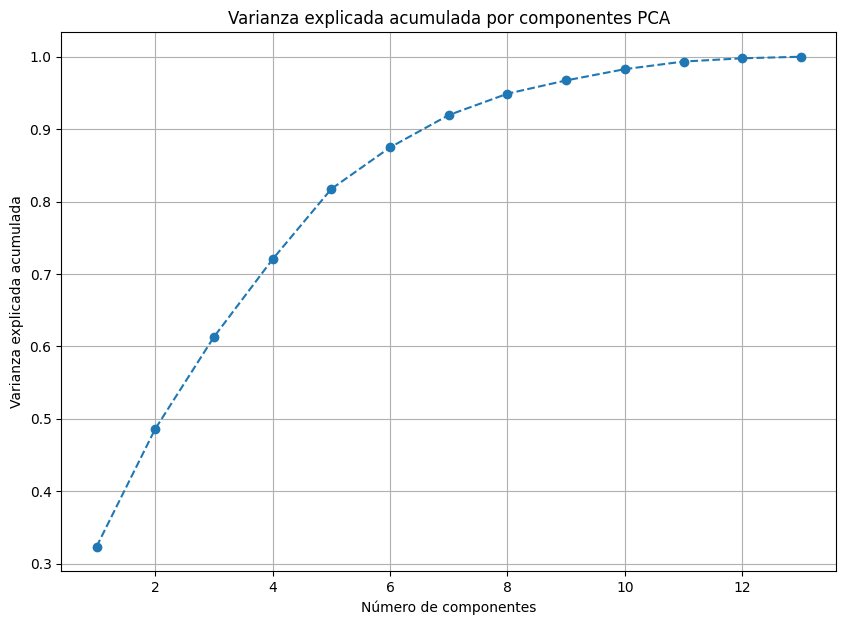

El número óptimo de componentes PCA es: 5


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(df)
varianza_explicada_acum = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(varianza_explicada_acum) + 1), varianza_explicada_acum, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

n_optimo_pca = next(x for x, val in enumerate(varianza_explicada_acum) if val > 0.8) + 1
print(f"El número óptimo de componentes PCA es: {n_optimo_pca}")


In [ ]:
categorical_columns = ['gender']
df = pd.get_dummies(df, columns=categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

El número óptimo de clusters según el método del codo es: 3


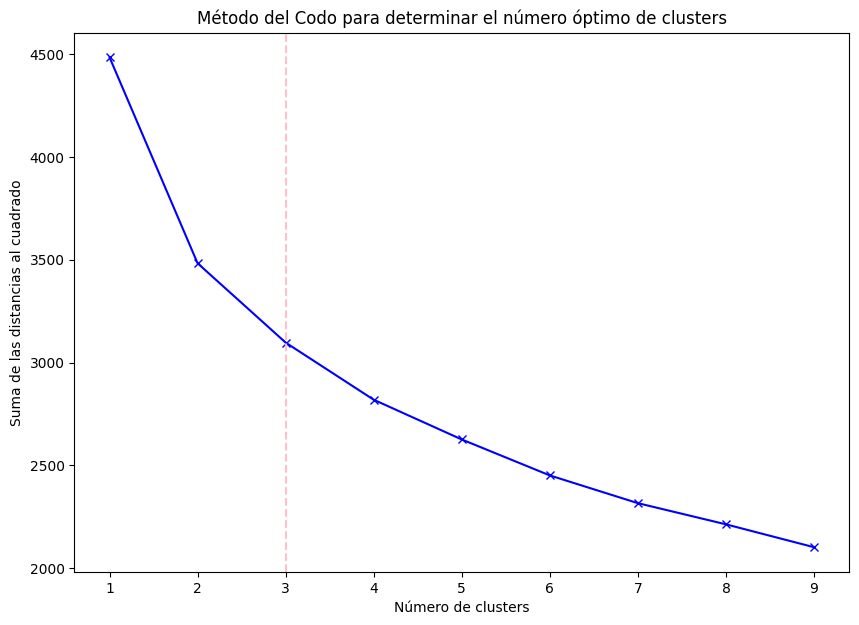

In [ ]:
# Método del codo
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
sumas_distancias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(df)
    sumas_distancias.append(kmeans.inertia_)

# Método del codo
plt.figure(figsize=(10, 7))
plt.plot(K, sumas_distancias, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.title('Método del Codo para determinar el número óptimo de clusters')

# Punto óptimo
kn = KneeLocator(K, sumas_distancias, curve='convex', direction='decreasing')
print(f"El número óptimo de clusters según el método del codo es: {kn.knee}")

plt.axvline(x=kn.knee, linestyle='--', color='pink')
plt.show()

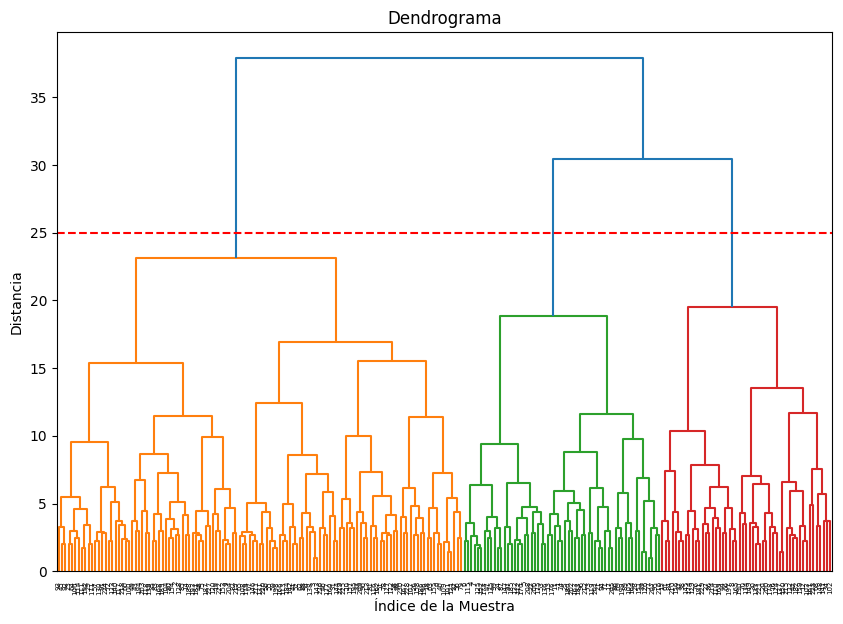

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Dendograma
Z = linkage(df, 'ward')
valor_corte = 25
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.axhline(y=valor_corte, color='r', linestyle='--')
plt.title('Dendrograma')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Distancia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

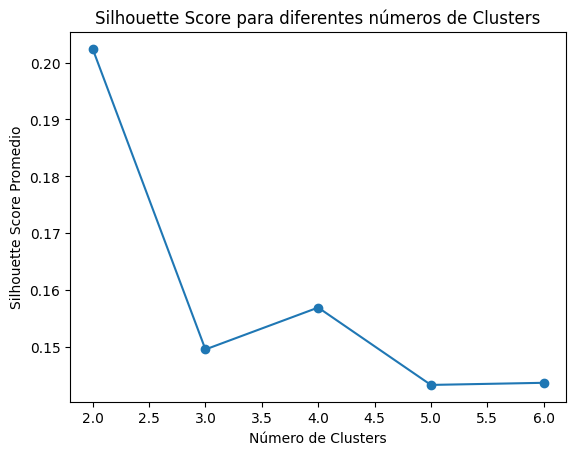

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_avg_scores = []
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score Promedio')
plt.title('Silhouette Score para diferentes números de Clusters')
plt.show()

## Clusterización por K-Means
Justificación del método K-means para la clusterización de preferencias laborales de la Generación Z
1. Simplicidad y eficiencia: K-means es un algoritmo intuitivo y fácil de implementar, lo que lo convierte en una opción atractiva para el análisis de grandes conjuntos de datos. Su eficiencia computacional también lo hace ideal para explorar diferentes valores de k y visualizar los resultados.

2. Interpretabilidad: Los clusters creados por K-means son fácilmente interpretables al observar los centroides, que representan el "centro" de cada grupo. Esto facilita la identificación de patrones y tendencias en las preferencias laborales de la Generación Z.

3. Escalabilidad: K-means se puede escalar fácilmente a grandes conjuntos de datos sin perder eficiencia. Esto es crucial para analizar las vastas cantidades de datos disponibles sobre la Generación Z.

4. Flexibilidad: K-means es flexible en cuanto a la elección de la distancia entre puntos y la métrica de evaluación de la calidad de los clusters. Esto te permite adaptar el algoritmo a las características específicas del dataset y a los objetivos de análisis.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  influence_factors continue_education work_3_years unaligned_mission  \
0                 2                  1            1                 0   
1                 2                  3            1                 0   
2                 5                  1            2                 1   
3                 3                  3            1                 0   
4                 4                  3            2                 0   

  unaligned_actions social_impact preferred_environment preferred_employer  \
0                 0             4                     6                  1   
1                 0             1                     1                  1   
2                 1             7                     2                  1   
3                 0             6                     2                  1   
4                 0             5                     1                  1   

  learning_environment preferred_manager team_size_preference  \
0                    1     

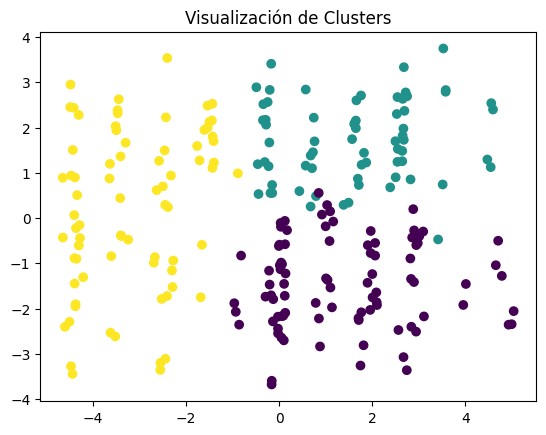

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans


n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df)

df['cluster'] = kmeans.labels_

print(df.head())

print(df.groupby('cluster').describe())

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df)

import matplotlib.pyplot as plt

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)
plt.title("Visualización de Clusters")
plt.show()

In [ ]:
df_sin_cluster = df.drop('cluster', axis=1)
df_sin_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   influence_factors      231 non-null    category
 1   continue_education     231 non-null    category
 2   work_3_years           231 non-null    category
 3   unaligned_mission      231 non-null    category
 4   unaligned_actions      231 non-null    category
 5   social_impact          231 non-null    category
 6   preferred_environment  231 non-null    category
 7   preferred_employer     231 non-null    category
 8   learning_environment   231 non-null    category
 9   preferred_manager      231 non-null    category
 10  team_size_preference   231 non-null    category
 11  preferred_career       231 non-null    category
 12  gender_0               231 non-null    uint8   
 13  gender_1               231 non-null    uint8   
dtypes: category(12), uint8(2)
memory usage: 5.

Cargas (loadings) de PCA:
 [[ 0.01243268  0.02636364 -0.01578559  0.03563151  0.03081081  0.96591573
  -0.0015037   0.00538449 -0.02762566 -0.03767965  0.02578086 -0.06655358
   0.01707227 -0.01707227 -0.2362159 ]
 [ 0.02831027 -0.04830643  0.08856959  0.00373481  0.04286493  0.05062232
   0.2916952   0.00437379  0.85437576  0.06696959  0.00520016 -0.35771449
   0.0013933  -0.0013933   0.19253003]
 [ 0.35674909  0.09827405 -0.03381281 -0.05058027 -0.04414405  0.06357465
  -0.38795267  0.00225798  0.41488256 -0.25098447 -0.00974872  0.67702658
  -0.04317232  0.04317232  0.07456103]]
     influence_factors  continue_education  work_3_years  unaligned_mission  \
PC1           0.012433            0.026364     -0.015786           0.035632   
PC2           0.028310           -0.048306      0.088570           0.003735   
PC3           0.356749            0.098274     -0.033813          -0.050580   

     unaligned_actions  social_impact  preferred_environment  \
PC1           0.030811       0

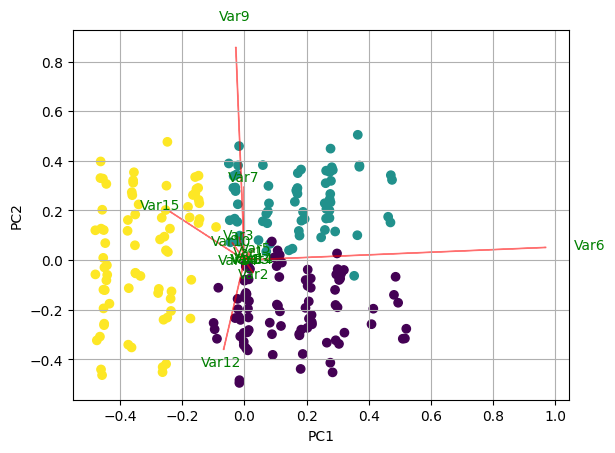

In [ ]:
# Análisis de componentes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
loadings = pca.components_
print("Cargas (loadings) de PCA:\n", loadings)

df_loadings = pd.DataFrame(loadings, columns=df.columns, index=['PC1', 'PC2', 'PC3'])
print(df_loadings)

def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=kmeans.labels_)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is not None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(reduced_data[:,0:2], np.transpose(pca.components_[0:2, :]), labels=df.columns)
plt.show()

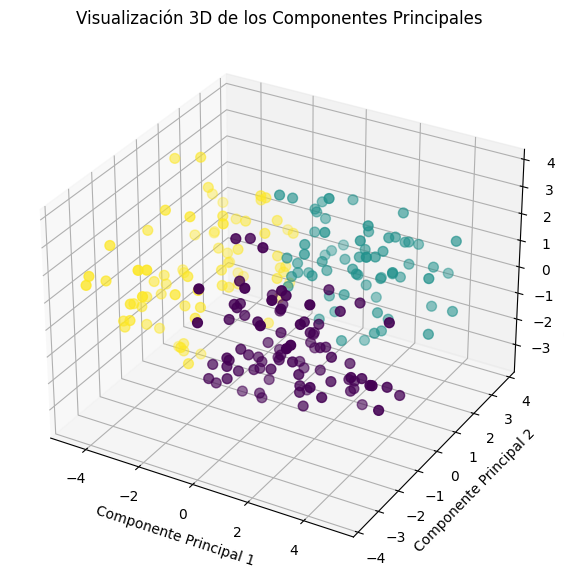

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=kmeans.labels_, cmap='viridis', s=50)

# Etiquetar los ejes con los nombres de los componentes principales
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")

# Títulos y visualización
plt.title("Visualización 3D de los Componentes Principales")
plt.show()


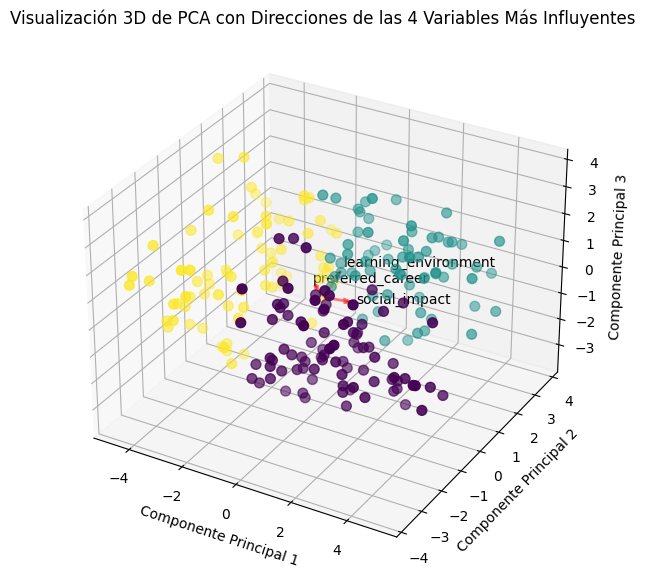

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Identificar las 4 variables más influyentes
loadings_magnitudes = np.sqrt(np.sum(pca.components_**2, axis=0))
top_variables_indices = np.argsort(loadings_magnitudes)[-3:]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=kmeans.labels_, cmap='viridis', s=50)

ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
plt.title("Visualización 3D de PCA con Direcciones de las 4 Variables Más Influyentes")

for i in top_variables_indices:
    var_name = df.drop('cluster', axis=1).columns[i]
    ax.quiver(0, 0, 0, pca.components_[0, i], pca.components_[1, i], pca.components_[2, i], length=1, color='r', alpha=0.5, lw=2)
    ax.text(pca.components_[0, i]*1.2, pca.components_[1, i]*1.2, pca.components_[2, i]*1.2, var_name, color='black')

plt.show()


In [ ]:
!pip install joblib
import joblib
joblib.dump(kmeans, '/content/drive/MyDrive/UCamp/Proyecto Final/kmeans.pkl')

['/content/drive/MyDrive/UCamp/Proyecto Final/kmeans.pkl']

In [ ]:
# Ver centroides
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df.drop('cluster', axis=1).columns)
print(centroids_df)

   influence_factors  continue_education  work_3_years  unaligned_mission  \
0           2.213333            1.680000      1.546667           0.266667   
1           2.382022            1.842697      1.348315           0.415730   
2           2.746269            1.880597      1.582090           0.298507   

   unaligned_actions  social_impact  preferred_environment  \
0           0.280000       2.333333               2.733333   
1           0.337079       6.460674               2.516854   
2           0.373134       6.970149               3.104478   

   preferred_employer  learning_environment  preferred_manager  \
0            1.040000              3.520000           2.133333   
1            1.044944              1.808989           1.786517   
2            1.059701              4.865672           1.552239   

   team_size_preference  preferred_career  gender_0  gender_1  
0              2.360000          2.560000  0.653333  0.346667  
1              2.471910          2.370787  0.6741

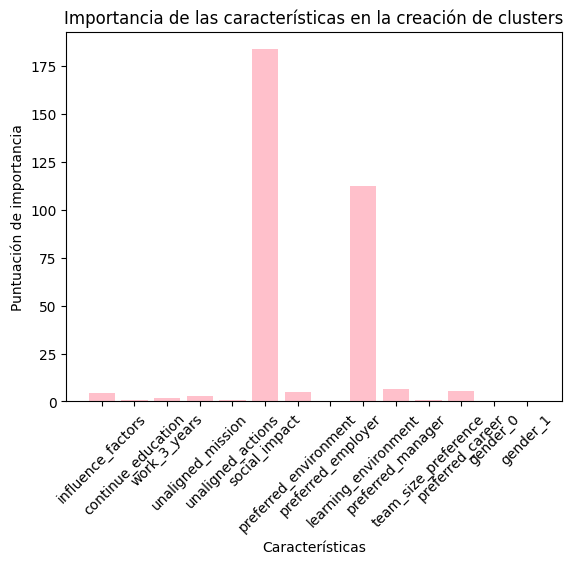

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=3)
selector.fit(df.drop('cluster', axis=1), df['cluster'])

scores = selector.scores_

feature_names = list(df.drop('cluster', axis=1))
plt.bar(feature_names, scores, color ='pink')
plt.xlabel("Características")
plt.ylabel("Puntuación de importancia")
plt.title("Importancia de las características en la creación de clusters")
plt.xticks(rotation=45)
plt.show()

Resumen de Características Distintivas de Clusters:

Cluster 0:
- Influenciados principalmente por "People who have changed the world for better" y "People from my circle, but not family members".
- Alta disposición a continuar la educación financiando ellos mismos.
- Prefieren trabajar en la empresa correcta aunque encuentren difícil la idea de estar 3 años o más.
- Valoración relativamente baja del impacto social de su trabajo.
- Preferencia por un ambiente de trabajo híbrido y empleadores enfocados en el aprendizaje.
- Inclinación hacia gerentes que explican lo esperado y ayudan a alcanzar metas.

Cluster 1:
- Similar disposición a continuar la educación y trabajar en una empresa correcta a largo plazo como el Cluster 0.
- Preferencia de trabajo híbrido
- Valoración significativamente alta del impacto social de su trabajo.
- Prefieren entornos de aprendizaje autodirigido combinados con programas de expertos.
- Gerentes preferidos son aquellos que describen claramente lo que necesitan.

Cluster 2:
- Mayor influencia de influencers exitosos y redes sociales como LinkedIn.
- Alta valoración del impacto social de su trabajo, similar al Cluster 1 pero con un promedio aún más alto.
- Fuerte preferencia por trabajar de manera remota o en un ambiente híbrido con muy pocos días en la oficina.
- Prefieren entornos de aprendizaje que incluyen la observación de otros y proyectos paralelos.

Notas Generales:
- Los tres clusters muestran una disposición hacia la educación financiada por sí mismos y una preferencia por empleadores enfocados en el aprendizaje.
- Las diferencias más marcadas se observan en la valoración del impacto social, el entorno de aprendizaje preferido, y las características del entorno de trabajo (remoto o híbrido).

### Conclusiones

A partir del dataset y del análisis de clusterización, se llegó a las siguientes conclusiones principales:
* Aunque en general los GenZ prefieren trabajar desde casa, la mayoría están dispuestos a asistir ocasionalmente a una oficina.
* Para los GenZ es importante que la empresa cumpla con su misión.
* Los GenZ le dan valor a la cultura del aprendizaje.
* La continuación de sus estudios en el extranjero es primordial para la mitad de los encuestados.
* Es necesario continuar recabando datos para crear modelos más robustos.

